#Scatter Plots
Scatter plots help visualize how two numeric variable are related in your data.

For example.. weigfht and height

Years of experience and sales volume for sales people

It can help you find outliers as well

Use scatter() function in matplotlib to create scatter plots


## Problem : Find relationship btwn GDP Per Capita and Life Expectancy

use countries.csv for this

use numpy for log functions

use matplotlib for scatter plot

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
!wget -nc https://raw.githubusercontent.com/dipbanik/MyTectraJuly/master/visualization/countries.csv

--2019-07-26 04:13:03--  https://raw.githubusercontent.com/dipbanik/MyTectraJuly/master/visualization/countries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82092 (80K) [text/plain]
Saving to: ‘countries.csv’

countries.csv       100%[===================>]  80.17K  --.-KB/s    in 0.02s   

2019-07-26 04:13:03 (3.23 MB/s) - ‘countries.csv’ saved [82092/82092]



In [3]:
data = pd.read_csv('countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
data_2007 = data[data.year == 2007]
data_2007.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


In [15]:
data_2007.reindex()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640
71,Australia,Oceania,2007,81.235,20434176,34435.367440
83,Austria,Europe,2007,79.829,8199783,36126.492700
95,Bahrain,Asia,2007,75.635,708573,29796.048340
107,Bangladesh,Asia,2007,64.062,150448339,1391.253792
119,Belgium,Europe,2007,79.441,10392226,33692.605080


In [0]:
?data_2007.reindex

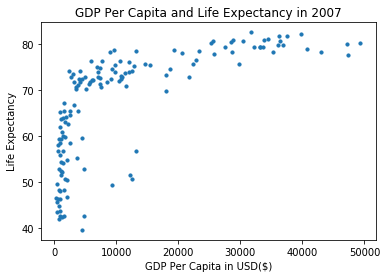

In [17]:
plt.scatter(data_2007.gdpPerCapita, data_2007.lifeExpectancy, 10)
# 10 is going to set the size of the dots in the scatter plot
plt.title('GDP Per Capita and Life Expectancy in 2007')
plt.xlabel('GDP Per Capita in USD($)')
plt.ylabel('Life Expectancy')
plt.show()

As we can see, the higher the GDP per Capita of a country, the higher the life expectancy it tends to be.

To double check this we will use the corelation  method to find the relationship between the two fields.

In [0]:
data_2007.gdpPerCapita.corr(data_2007.lifeExpectancy)

0.6786623986777587

more positive the value, higher the corelation.
more negative the value, more inverse relation between the two.
Both these cases are important.
When the corelation tends to 0, both the values are not corelated. 

If you see the scatter plot, you mighgt notice that the GDp per Capita and the life expectancy do not have a linear corelation. 
The life expectancy goes up very quickly till $10000 and then it improves very slowly from 10000 to 50000.
So we might think of looking at the GDp per capita not in the linear scale but in the log scale.
To do this we are going ro use np.log10() function.

In [18]:
np.log10([10, 100, 1000])

array([1., 2., 3.])

In [20]:
np.log10([50, 80, 6000])

array([1.69897   , 1.90308999, 3.77815125])

10^1 is 10, 10^2 is 100 and 10^3 is 1000

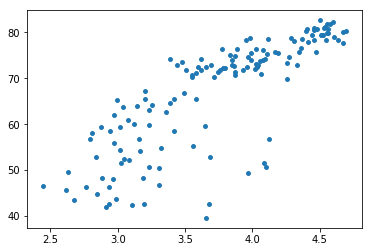

In [21]:
plt.scatter(np.log10(data_2007.gdpPerCapita), data_2007.lifeExpectancy, 15)
plt.show()

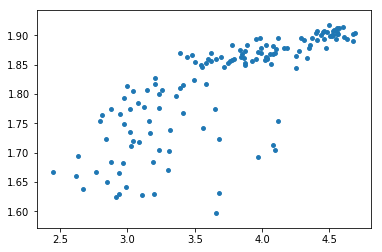

In [22]:
plt.scatter(np.log10(data_2007.gdpPerCapita), np.log10(data_2007.lifeExpectancy), 15)
plt.show()

This gives us a much more linear format

Let's now try to check the corr btwn the log10 of gdpPer Capita and the life Expectancy

In [0]:
   np.log10(data_2007.gdpPerCapita).corr(data_2007.lifeExpectancy)

0.8089802514849209

In [23]:
   np.log10(data_2007.lifeExpectancy).corr(data_2007.gdpPerCapita)

0.6385694931372555

This is a much stronger corelation, which means that it makes much more sense.

What we just did is data transformation.

You might need to transform your data from time to time to get favourable results. 

Now lets run this analysis for each available year in our data using a for loop.

In [24]:
sorted(set(data.year))

[1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]

In [0]:
years_sorted = sorted(set(data.year))

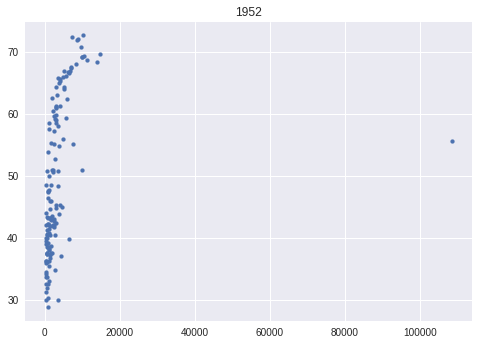

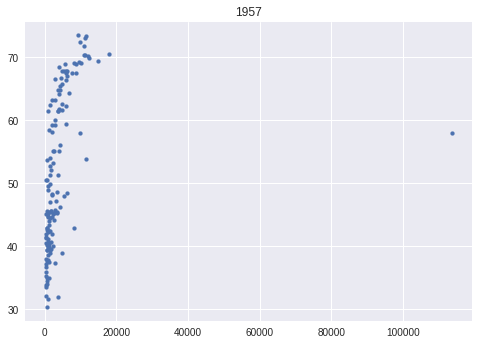

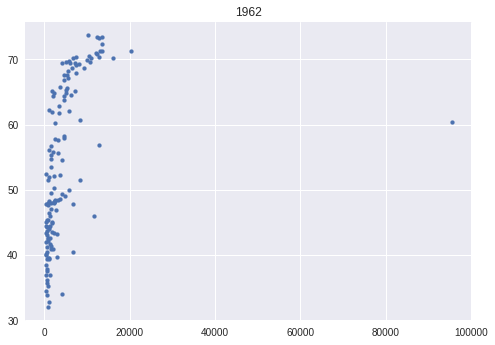

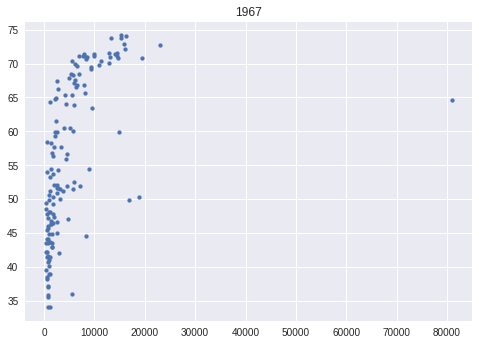

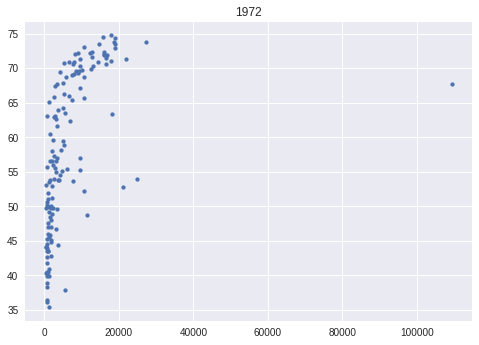

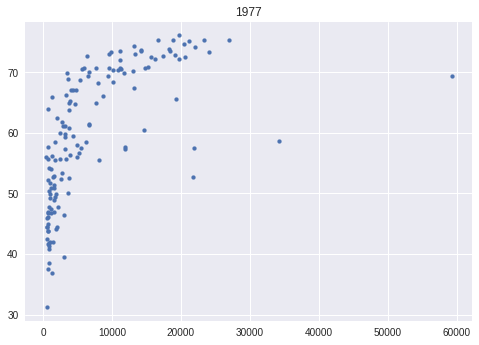

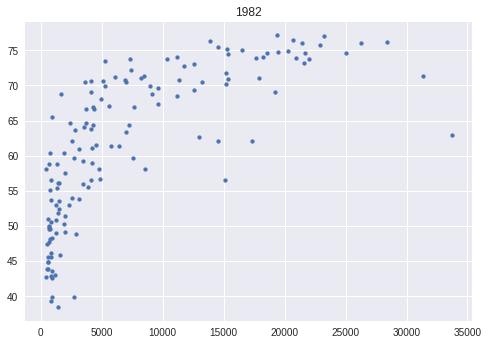

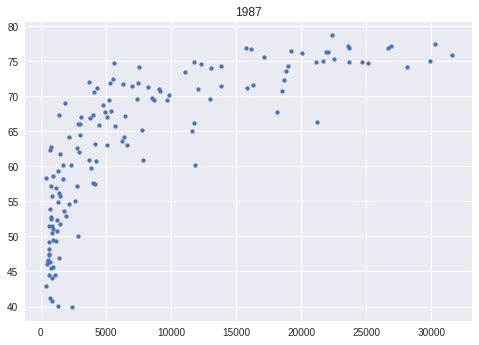

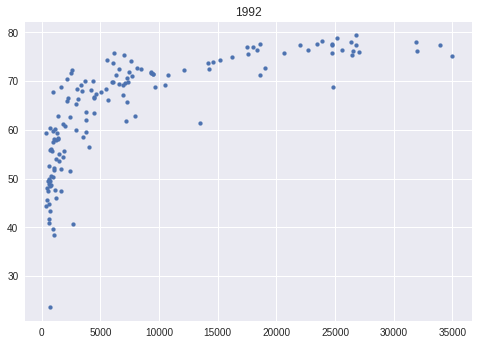

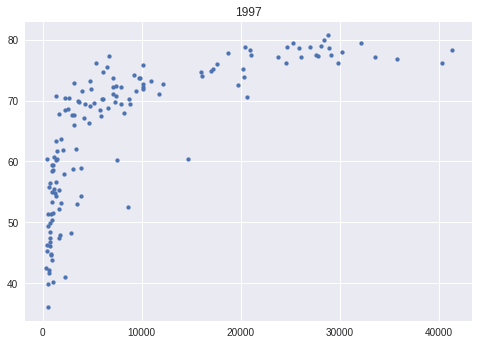

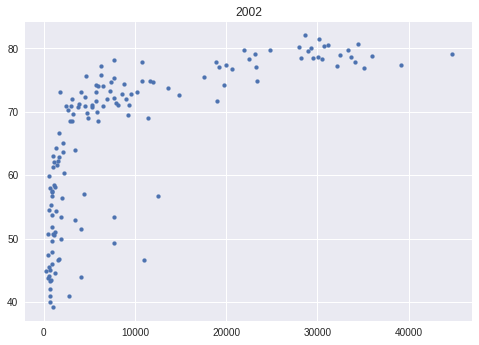

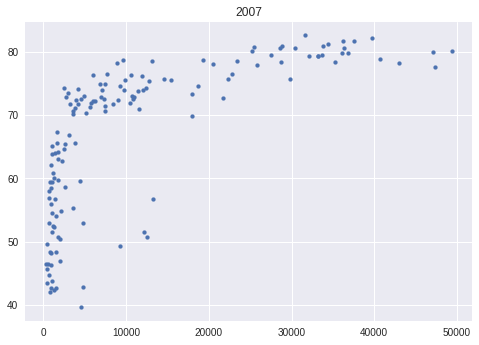

In [0]:
for given_year in years_sorted:
  data_year = data[data.year == given_year]
  plt.scatter(data_year.gdpPerCapita, data_year.lifeExpectancy, 15)
  plt.title(given_year)
  plt.show()

The ranges for X axis and Y Axis are considerably different depending on the year, so let us put a range functuion.

Look at the outlier in 1952. 

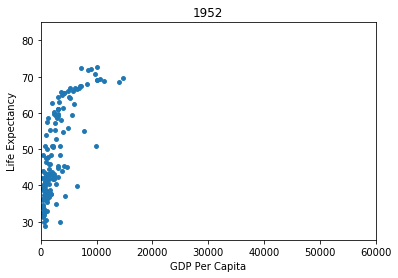

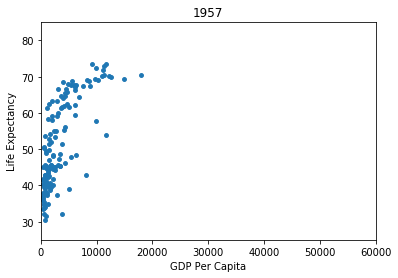

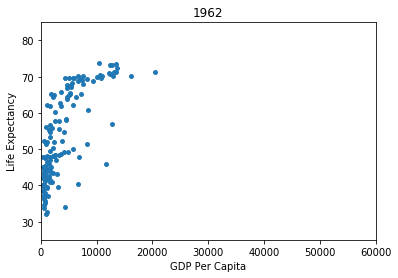

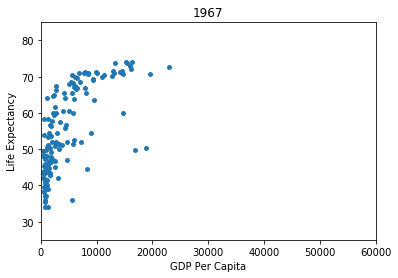

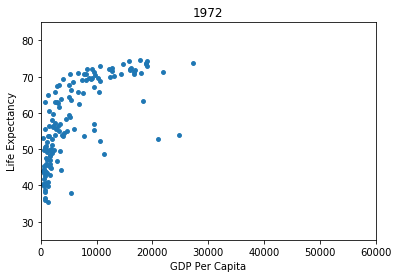

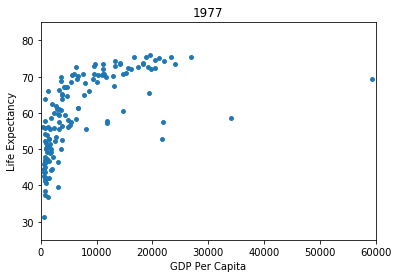

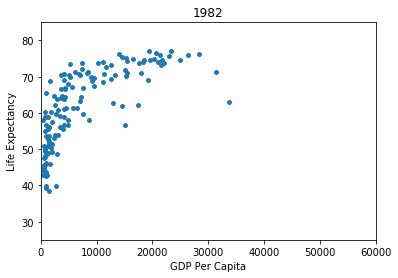

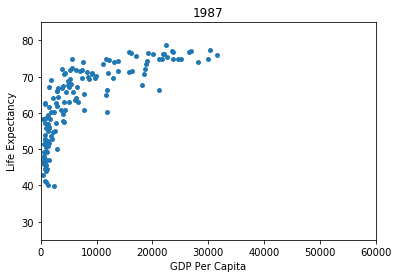

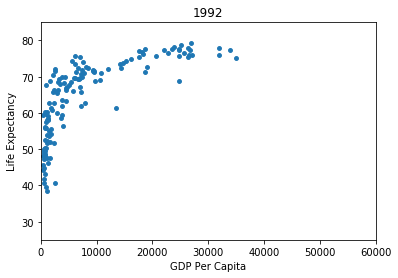

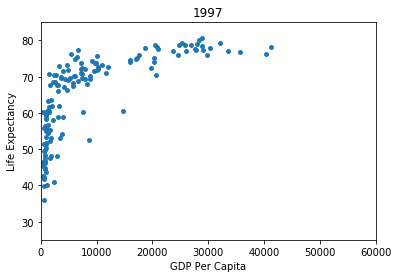

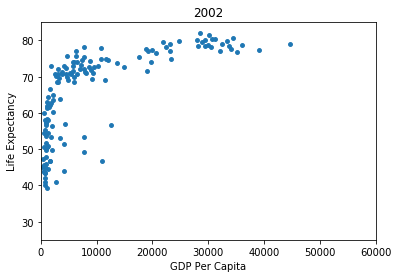

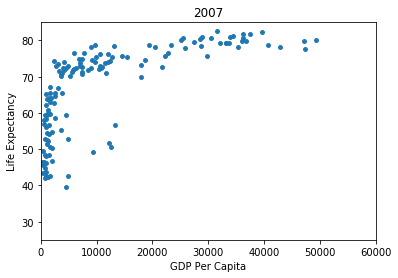

In [26]:
for given_year in years_sorted:
  data_year = data[data.year == given_year]
  plt.scatter(data_year.gdpPerCapita, data_year.lifeExpectancy, 15)
  plt.title(given_year)
  plt.xlim(0,60000)
  plt.ylim(25,85)++
  plt.xlabel('GDP Per Capita')
  plt.ylabel('Life Expectancy')
  plt.show()

We noticed the outlier in 1952.  Let's find out which country that was.

In [0]:
data[data.gdpPerCapita > 60000 ] 

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


In [27]:
data[data.country == "India" ] 

,country,continent,year,lifeExpectancy,population,gdpPerCapita
696,India,Asia,1952,37.373,372000000,546.565749
697,India,Asia,1957,40.249,409000000,590.061996
698,India,Asia,1962,43.605,454000000,658.347151
699,India,Asia,1967,47.193,506000000,700.770611
700,India,Asia,1972,50.651,567000000,724.032527
701,India,Asia,1977,54.208,634000000,813.337323
702,India,Asia,1982,56.596,708000000,855.723538
703,India,Asia,1987,58.553,788000000,976.512676
704,India,Asia,1992,60.223,872000000,1164.406809
705,India,Asia,1997,61.765,959000000,1458.817442


Let's try the same thing with the log of GDP Per Capita

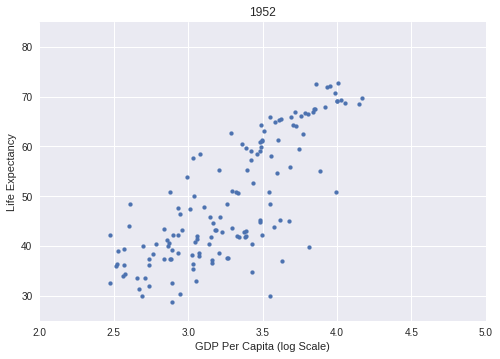

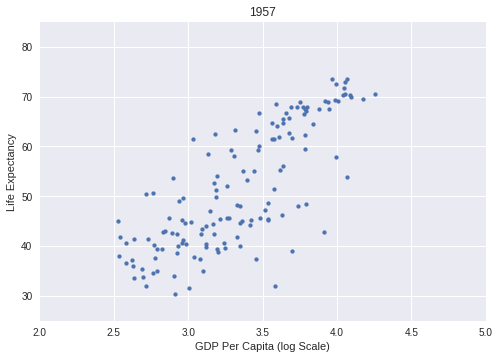

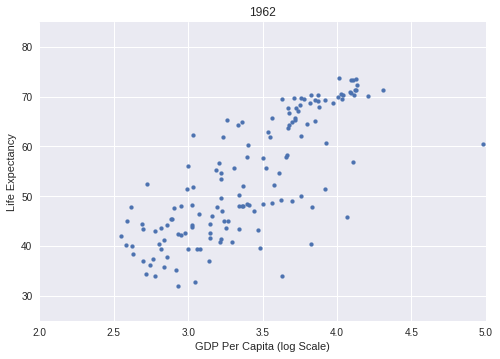

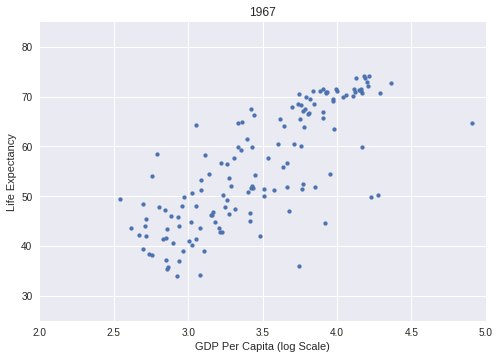

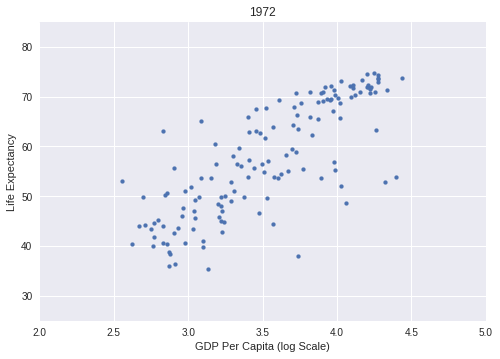

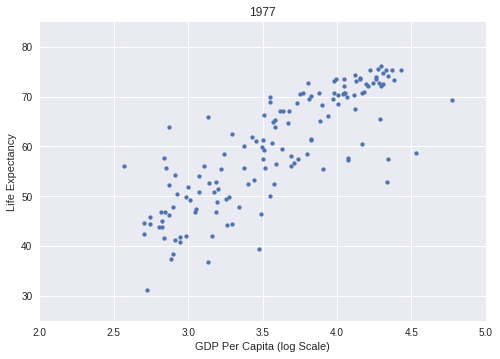

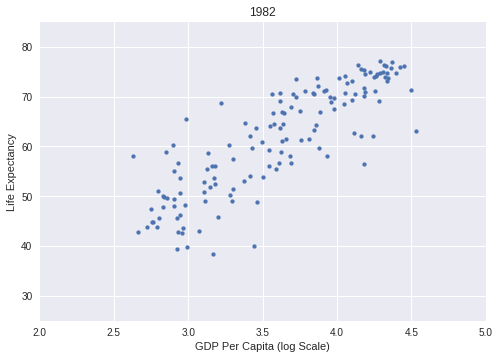

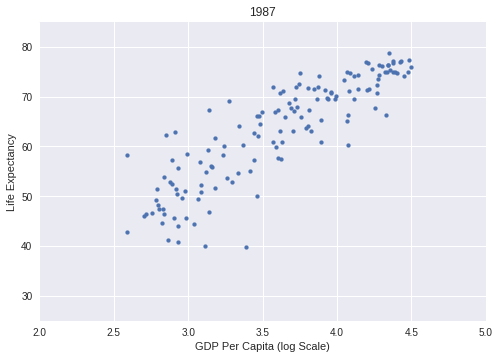

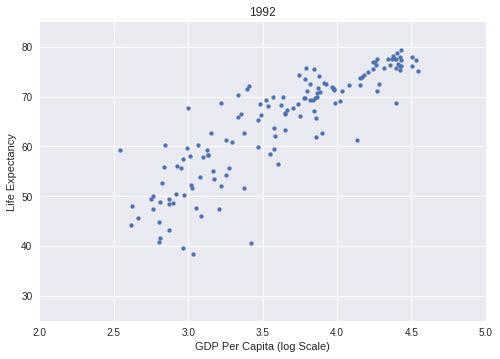

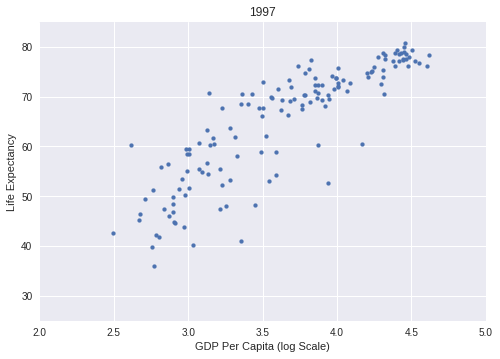

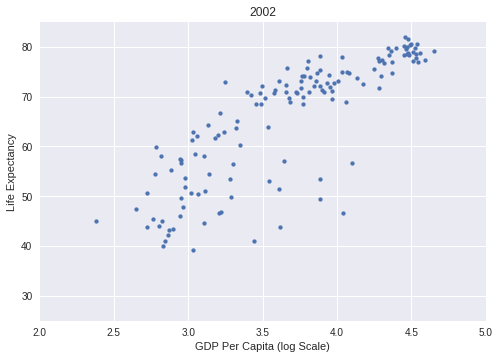

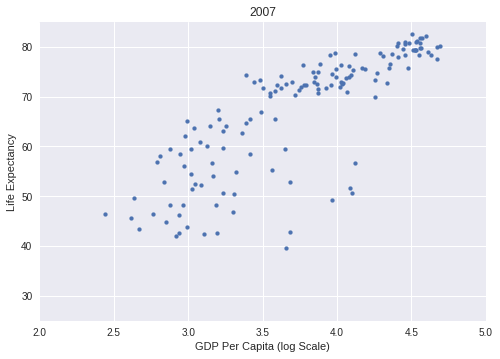

In [0]:
for given_year in years_sorted:
  data_year = data[data.year == given_year]
  plt.scatter(np.log10(data_year.gdpPerCapita), data_year.lifeExpectancy, 15)
  plt.title(given_year)
  plt.xlim(2,5)
  plt.ylim(25,85)
  plt.xlabel('GDP Per Capita (log Scale)')
  plt.ylabel('Life Expectancy')
  plt.show()

##Practice Problem : Examine Relationship between GDP (Not GDP per Capita) and life Expectancy in 2007.

GDP = GDP Per Capita * population

Use both raw GDP and log of GDP to show the scatter plot.

GDP can be very high s divide them so that it can be converted to billions.